### IMPORTING LIBARIES

In [28]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## DATA PREPROCESSING
### TRAINING IMAGE PREPROCESSING

In [29]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### VALIDATION IMAGE PROCESSING

In [30]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [31]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [32]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[192.25 182.25 180.25]
   [191.   181.   179.  ]
   [181.   171.   169.  ]
   ...
   [179.25 167.25 167.25]
   [173.75 161.75 161.75]
   [181.5  169.5  169.5 ]]

  [[179.   169.   167.  ]
   [195.25 185.25 183.25]
   [187.25 177.25 175.25]
   ...
   [170.75 158.75 158.75]
   [181.25 169.25 169.25]
   [184.5  172.5  172.5 ]]

  [[197.25 187.25 185.25]
   [191.25 181.25 179.25]
   [186.5  176.5  174.5 ]
   ...
   [173.5  161.5  161.5 ]
   [180.25 168.25 168.25]
   [175.   163.   163.  ]]

  ...

  [[180.   168.   168.  ]
   [185.25 173.25 173.25]
   [183.25 171.25 171.25]
   ...
   [179.   167.   167.  ]
   [181.   169.   169.  ]
   [178.25 166.25 166.25]]

  [[185.5  173.5  173.5 ]
   [190.5  178.5  178.5 ]
   [178.5  166.5  166.5 ]
   ...
   [179.   167.   167.  ]
   [176.5  164.5  164.5 ]
   [172.   160.   160.  ]]

  [[192.75 180.75 180.75]
   [177.   165.   165.  ]
   [183.5  171.5  171.5 ]
   ...
   [172.   160.   160.  ]
   [177.75 165.75 165.75]
   [179.75 167.75 16

### TO AVOID OVERSHOOTING
1. CHOOSE SMALL LEARING RATE DEFAULT 0.001 WE ARE TAKING 0.0001.
2. THERE MAY BE CHANCE OF UNDERFITTING,SO INCREASE NUMBER OF NEURON
3. ADD MORE CONVOLUTION LAYER TO EXRTRACT MORE FEATURE FROM IMAGE

### BUILDING MODEL

In [33]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [34]:
model = Sequential()

### BUILDING CONVOLUTION LAYER

In [35]:
model.add(Conv2D(filters = 32,kernel_size = 3,padding = 'same', activation = 'relu', input_shape =[128,128,3]))
model.add(Conv2D(filters = 32,kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [36]:
model.add(Conv2D(filters = 64,kernel_size = 3,padding = 'same', activation = 'relu', input_shape =[128,128,3]))
model.add(Conv2D(filters = 64,kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [37]:
model.add(Conv2D(filters = 128,kernel_size = 3,padding = 'same', activation = 'relu', input_shape =[128,128,3]))
model.add(Conv2D(filters = 128,kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [38]:
model.add(Conv2D(filters = 256,kernel_size = 3,padding = 'same', activation = 'relu', input_shape =[128,128,3]))
model.add(Conv2D(filters = 256,kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [39]:
model.add(Conv2D(filters = 512,kernel_size = 3,padding = 'same', activation = 'relu', input_shape =[128,128,3]))
model.add(Conv2D(filters = 512,kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [40]:
model.add(Dropout(0.25))

In [41]:
model.add(Flatten())

In [42]:
model.add(Dense(units = 1500,activation = 'relu'))

In [43]:
model.add(Dropout(0.4))

### OUTPUT LAYER

In [44]:
model.add(Dense(units = 38,activation = 'softmax'))

### COMPILING MODEL

In [45]:
model.compile(optimizer =tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [46]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### MODEL TRANING

In [47]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1063s 483ms/step - accuracy: 0.3855 - loss: 2.1769 - val_accuracy: 0.8466 - val_loss: 0.4725
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1189s 541ms/step - accuracy: 0.8432 - loss: 0.5013 - val_accuracy: 0.9155 - val_loss: 0.2601
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 962s 438ms/step - accuracy: 0.9105 - loss: 0.2774 - val_accuracy: 0.9346 - val_loss: 0.2125
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3138s 1s/step - accuracy: 0.9377 - loss: 0.1909 - val_accuracy: 0.9477 - val_loss: 0.1628
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 923s 420ms/step - accuracy: 0.9556 - loss: 0.1344 - val_accuracy: 0.9484 - val_loss: 0.1670
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 917s 417ms/step - accuracy: 0.9632 - loss: 0.1110 - val_accuracy: 0.9610 - val_loss: 0.1234
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3428s 2s/step - accuracy: 0.9699 - loss: 0.0904 - val_accuracy: 0.9654 - val_loss: 0.1116
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 12974s 6s/step - accur

### MODEL EVALUATION ON TRAINING SET

In [48]:
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 282s 128ms/step - accuracy: 0.9699 - loss: 0.0895


In [49]:
print(train_loss,train_acc)

0.08328405022621155 0.9727007746696472


### MODEL EVALUATION ON VALIDATION SET

In [50]:
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 71s 129ms/step - accuracy: 0.9455 - loss: 0.1696 


In [51]:
print(val_loss,val_acc)

0.17926707863807678 0.9436603784561157


### SAVING MODEL

In [71]:
model.save('trained_model.keras')

In [53]:
training_history.history

{'accuracy': [0.5916210412979126,
  0.8646418452262878,
  0.9162102341651917,
  0.9415321350097656,
  0.9574507474899292,
  0.9660431146621704,
  0.9714062213897705,
  0.976854681968689,
  0.9801835417747498,
  0.9820044040679932],
 'loss': [1.3897104263305664,
  0.4282246530056,
  0.2581044137477875,
  0.17788246273994446,
  0.1289295107126236,
  0.10275047272443771,
  0.08709479868412018,
  0.07143477350473404,
  0.060620296746492386,
  0.05690837278962135],
 'val_accuracy': [0.8466309905052185,
  0.9154905676841736,
  0.9345549941062927,
  0.9477008581161499,
  0.9483838081359863,
  0.9609606266021729,
  0.9653995037078857,
  0.9653995037078857,
  0.9718301892280579,
  0.9436603784561157],
 'val_loss': [0.47248131036758423,
  0.2601339519023895,
  0.21253283321857452,
  0.16282576322555542,
  0.16704486310482025,
  0.12340330332517624,
  0.11159839481115341,
  0.11110043525695801,
  0.09711313247680664,
  0.17926712334156036]}

### RECORDING HISTORY IN JSON

In [54]:
import json
with open ("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [ ]:
training_history.history['accuracy']

[0.5916210412979126,
 0.8646418452262878,
 0.9162102341651917,
 0.9415321350097656,
 0.9574507474899292,
 0.9660431146621704,
 0.9714062213897705,
 0.976854681968689,
 0.9801835417747498,
 0.9820044040679932]

In [ ]:
training_history.history['val_accuracy']

[0.8466309905052185,
 0.9154905676841736,
 0.9345549941062927,
 0.9477008581161499,
 0.9483838081359863,
 0.9609606266021729,
 0.9653995037078857,
 0.9653995037078857,
 0.9718301892280579,
 0.9436603784561157]

### ACCURACY VISUALIZATION

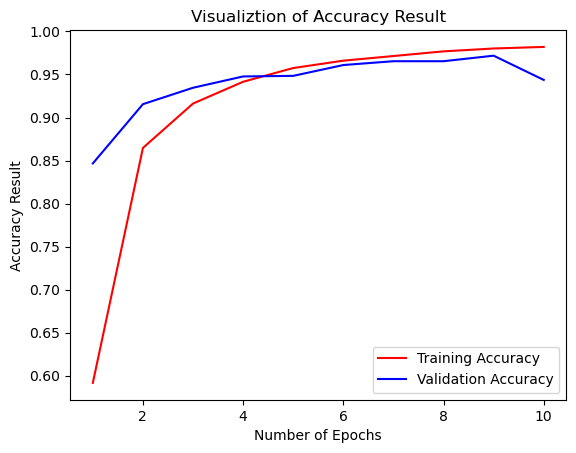

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color = 'red', label = 'Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color = 'blue', label = 'Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualiztion of Accuracy Result")
plt.legend()
plt.show()

### SOME OTHER METRIC FOR MODEL EVALUATION

In [ ]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [ ]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 67s 121ms/step 


(array([[9.99999881e-01, 1.89324237e-10, 4.48780561e-11, ...,
         4.33036542e-16, 1.96345347e-16, 2.54668980e-13],
        [9.99977589e-01, 7.03758518e-09, 3.37268859e-11, ...,
         3.18205884e-15, 1.73530359e-15, 9.07495487e-13],
        [1.00000000e+00, 1.17936860e-09, 8.42573442e-11, ...,
         8.68035725e-18, 5.26147485e-16, 6.47988268e-14],
        ...,
        [1.73326651e-08, 4.12290335e-09, 4.82733526e-07, ...,
         1.26485755e-08, 9.27748989e-09, 9.99352872e-01],
        [1.56076055e-10, 1.37047285e-12, 1.19423282e-09, ...,
         3.63472794e-11, 2.12796569e-11, 9.99999166e-01],
        [2.80274075e-15, 4.23153606e-17, 1.36825247e-14, ...,
         3.49525631e-17, 5.60574610e-17, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [ ]:
predicted_categories = tf.argmax(y_pred,axis = 1)

In [ ]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [ ]:
true_categories = tf.concat([y for x,y in test_set], axis = 0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [ ]:
Y_true = tf.argmax(true_categories,axis = 1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(Y_true,predicted_categories,target_names = class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.92      0.95       504
                                 Apple___Black_rot       0.97      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.93      0.98      0.95       440
                                   Apple___healthy       0.93      0.94      0.93       502
                               Blueberry___healthy       0.91      0.99      0.95       454
          Cherry_(including_sour)___Powdery_mildew       0.96      0.99      0.97       421
                 Cherry_(including_sour)___healthy       1.00      0.89      0.94       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.98      0.84      0.90       410
                       Corn_(maize)___Common_rust_       1.00      0.99      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.88      0.99      0.

In [ ]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[462,   9,   0, ...,   0,   0,   0],
       [  0, 491,   1, ...,   0,   0,   0],
       [  0,   0, 431, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 471,   2,   0],
       [  0,   0,   0, ...,   0, 442,   0],
       [  0,   0,   1, ...,   0,   0, 478]], dtype=int64)

### CONFUSION MATRIX VISUALIZATION

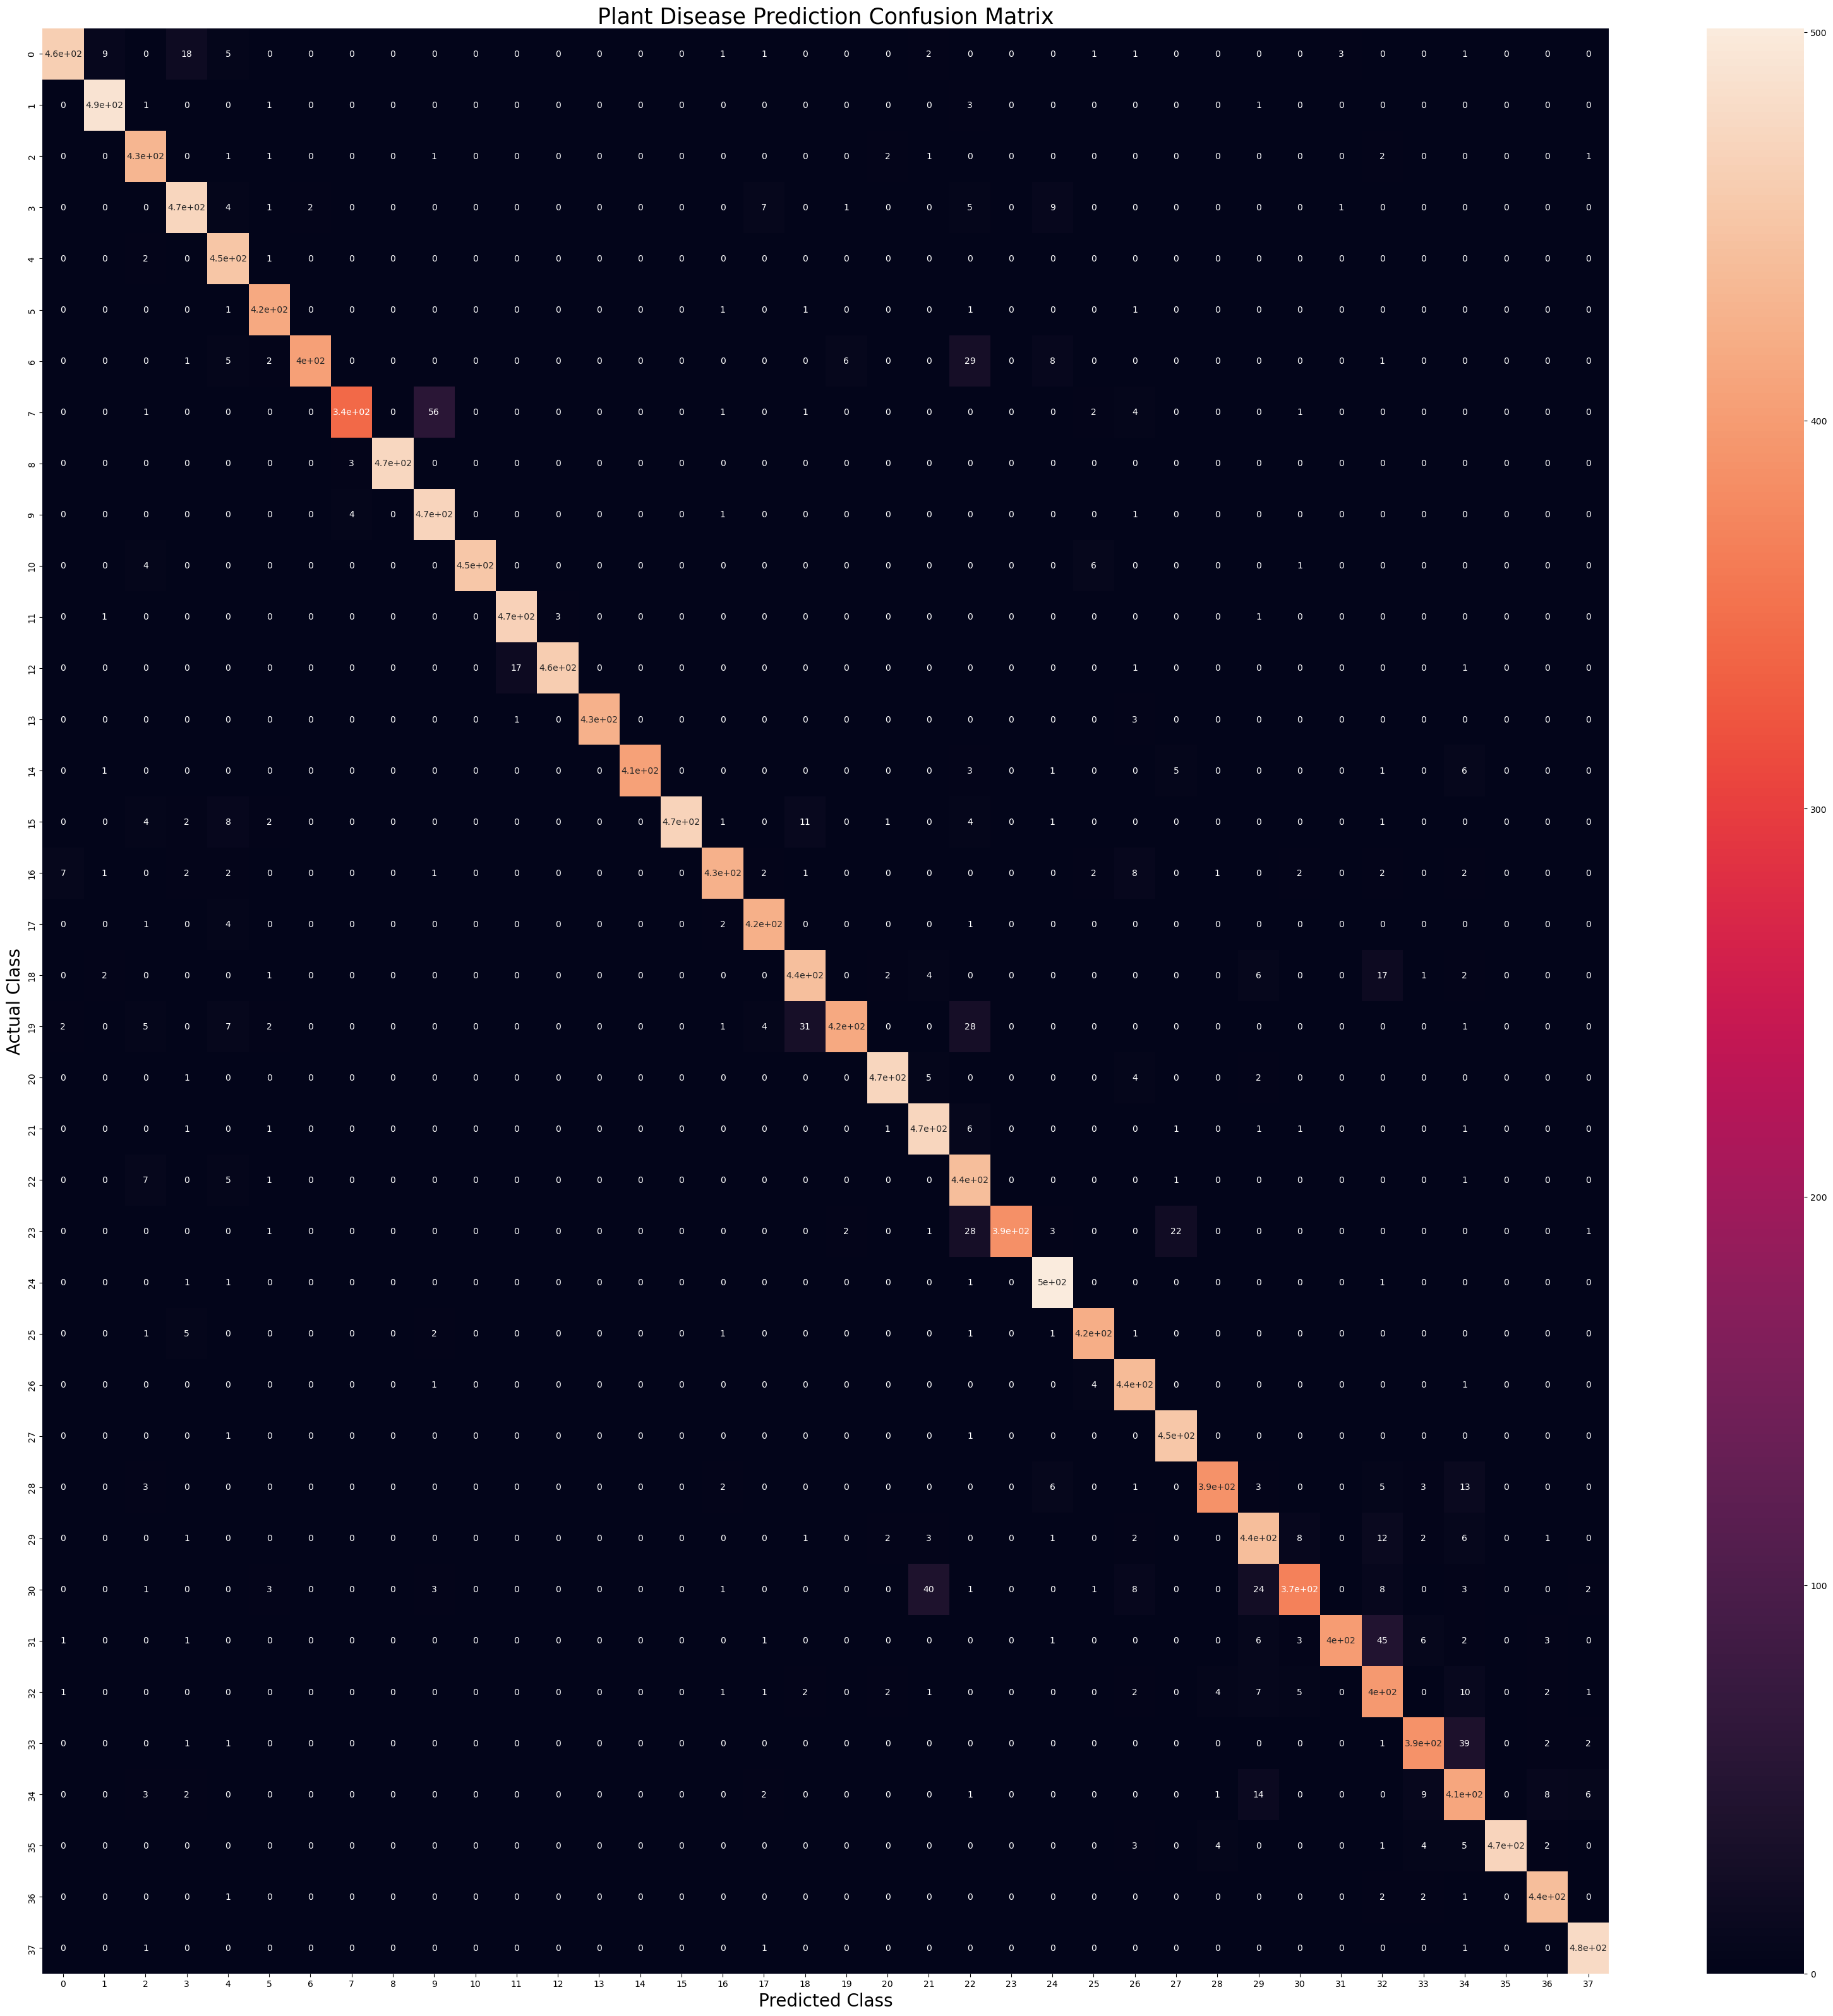

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot=True, annot_kws={'size': 10})
plt.xlabel("Predicted Class",fontsize = 20)
plt.ylabel("Actual Class",fontsize = 20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize = 25)
plt.show()